# Introduction

Since Jan. 1, 2015, [The Washington Post](https://www.washingtonpost.com/) has been compiling a database of every fatal shooting in the US by a police officer in the line of duty. 

<center><img src=https://i.imgur.com/sX3K62b.png></center>

While there are many challenges regarding data collection and reporting, The Washington Post has been tracking more than a dozen details about each killing. This includes the race, age and gender of the deceased, whether the person was armed, and whether the victim was experiencing a mental-health crisis. The Washington Post has gathered this supplemental information from law enforcement websites, local new reports, social media, and by monitoring independent databases such as "Killed by police" and "Fatal Encounters". The Post has also conducted additional reporting in many cases.

There are 4 additional datasets: US census data on poverty rate, high school graduation rate, median household income, and racial demographics. [Source of census data](https://factfinder.census.gov/faces/nav/jsf/pages/community_facts.xhtml).

### Upgrade Plotly

Run the cell below if you are working with Google Colab

In [55]:
#%pip install --upgrade plotly

## Import Statements

In [1]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import matplotlib.ticker as ticker
import warnings
warnings.filterwarnings('ignore')
from matplotlib.ticker import MultipleLocator

## Notebook Presentation

In [2]:
pd.options.display.float_format = '{:,.2f}'.format

## Load the Data

In [3]:
df_hh_income = pd.read_csv('Median_Household_Income_2015.csv', encoding="windows-1252")
df_pct_poverty = pd.read_csv('Pct_People_Below_Poverty_Level.csv', encoding="windows-1252")
df_pct_completed_hs = pd.read_csv('Pct_Over_25_Completed_High_School.csv', encoding="windows-1252")
df_share_race_city = pd.read_csv('Share_of_Race_By_City.csv', encoding="windows-1252")
df_fatalities = pd.read_csv('Deaths_by_Police_US.csv', encoding="windows-1252")

# Preliminary Data Exploration

* What is the shape of the DataFrames? 
* How many rows and columns do they have?
* What are the column names?
* Are there any NaN values or duplicates?

In [4]:
print(f"Theincome Dataframes shape is: {df_hh_income.shape}. It has {df_hh_income.shape[0]} rows and {df_hh_income.shape[1]} columns.")
print(f"The poverty Dataframes shape is: {df_pct_poverty.shape}. It has {df_pct_poverty.shape[0]} rows and {df_pct_poverty.shape[1]} columns.")
print(f"The Completed_hs Dataframes shape is: {df_pct_completed_hs.shape}. It has {df_pct_completed_hs.shape[0]} rows and {df_pct_completed_hs.shape[1]} columns.")
print(f"The share race city Dataframes shape is: {df_share_race_city.shape}. It has {df_share_race_city.shape[0]} rows and {df_share_race_city.shape[1]} columns.")
print(f"The fatalities Dataframes shape is: {df_fatalities.shape}. It has {df_fatalities.shape[0]} rows and {df_fatalities.shape[1]} columns.")

Theincome Dataframes shape is: (29322, 3). It has 29322 rows and 3 columns.
The poverty Dataframes shape is: (29329, 3). It has 29329 rows and 3 columns.
The Completed_hs Dataframes shape is: (29329, 3). It has 29329 rows and 3 columns.
The share race city Dataframes shape is: (29268, 7). It has 29268 rows and 7 columns.
The fatalities Dataframes shape is: (2535, 14). It has 2535 rows and 14 columns.


In [5]:
print(f"The column names of income Dataframe is: {df_hh_income.columns.tolist()}")
print(f"The column names of poverty Dataframe is: {df_pct_poverty.columns.tolist()}")
print(f"The column names of Completed_hs Dataframe is: {df_pct_completed_hs.columns.tolist()}")
print(f"The column names of share race city Dataframe is: {df_share_race_city.columns.tolist()}")
print(f"The column names of fatalities Dataframe is: {df_fatalities.columns.tolist()}")

The column names of income Dataframe is: ['Geographic Area', 'City', 'Median Income']
The column names of poverty Dataframe is: ['Geographic Area', 'City', 'poverty_rate']
The column names of Completed_hs Dataframe is: ['Geographic Area', 'City', 'percent_completed_hs']
The column names of share race city Dataframe is: ['Geographic area', 'City', 'share_white', 'share_black', 'share_native_american', 'share_asian', 'share_hispanic']
The column names of fatalities Dataframe is: ['id', 'name', 'date', 'manner_of_death', 'armed', 'age', 'gender', 'race', 'city', 'state', 'signs_of_mental_illness', 'threat_level', 'flee', 'body_camera']


In [6]:
l = [df_fatalities, df_hh_income, df_pct_completed_hs, df_pct_poverty, df_share_race_city]
names = ['df_fatalities', 'df_hh_income', 'df_pct_completed_hs', 'df_pct_poverty', 'df_share_race_city']
for i, name in zip(l, names):
    if i.duplicated().values.any() and i.isna().values.any():
        print(f"In {name} Dataframe there are some duplicates and NaN values")
    elif not i.duplicated().values.any() and not i.isna().values.any():
        print(f"In {name} Dataframe there are no duplicates and no NaN values")
    elif i.duplicated().values.any() and not i.isna().values.any():
        print(f"In {name} Dataframe there are duplicates")
    elif not i.duplicated().values.any() and i.isna().values.any():
        print(f"In {name} Dataframe there are NaN values")

In df_fatalities Dataframe there are NaN values
In df_hh_income Dataframe there are NaN values
In df_pct_completed_hs Dataframe there are no duplicates and no NaN values
In df_pct_poverty Dataframe there are no duplicates and no NaN values
In df_share_race_city Dataframe there are no duplicates and no NaN values


## Data Cleaning - Check for Missing Values and Duplicates

Consider how to deal with the NaN values. Perhaps substituting 0 is appropriate. 

#### I will remove all rows with Nan values becaues of big number of records and low % missing values

In [7]:
print(f"The % of missing data in df_hh_income is equal {round(df_hh_income.isna().sum()['Median Income']*100/df_hh_income.shape[0],2)}")
print(f"The % of missing data in df_pct_poverty is equal {round(df_pct_poverty.isna().sum()['poverty_rate']*100/df_pct_poverty.shape[0],2)}")
print(f"The % of missing data in df_pct_completed_hs is equal {round(df_pct_completed_hs.isna().sum()['percent_completed_hs']*100/df_pct_completed_hs.shape[0],2)}")
print(f"The % of missing data in df_share_race_city is equal {round(df_share_race_city.isna().sum()*100/df_pct_poverty.shape[0],2)}")
print(f"The % of missing data in df_fatalities is equal {round(df_fatalities.isna().sum()*100/df_pct_poverty.shape[0],2)}")

The % of missing data in df_hh_income is equal 0.17
The % of missing data in df_pct_poverty is equal 0.0
The % of missing data in df_pct_completed_hs is equal 0.0
The % of missing data in df_share_race_city is equal Geographic area         0.00
City                    0.00
share_white             0.00
share_black             0.00
share_native_american   0.00
share_asian             0.00
share_hispanic          0.00
dtype: float64
The % of missing data in df_fatalities is equal id                        0.00
name                      0.00
date                      0.00
manner_of_death           0.00
armed                     0.03
age                       0.26
gender                    0.00
race                      0.66
city                      0.00
state                     0.00
signs_of_mental_illness   0.00
threat_level              0.00
flee                      0.22
body_camera               0.00
dtype: float64


### The df_fatalities Dataframe is an exception becaues things like armed race and flee could be hard to define during the action

In [8]:
df_hh_income=df_hh_income.dropna()
df_pct_poverty=df_pct_poverty.dropna()
df_pct_completed_hs=df_pct_completed_hs.dropna()
df_share_race_city=df_share_race_city.dropna()
df_fatalities=df_fatalities.dropna(subset=["age"])
l=['armed','race','flee']
for col in l:
    df_fatalities[col] = df_fatalities[col].fillna('unknown')

# Chart the Poverty Rate in each US State

Create a bar chart that ranks the poverty rate from highest to lowest by US state. Which state has the highest poverty rate? Which state has the lowest poverty rate?  Bar Plot

In [10]:
df_pct_poverty['poverty_rate'] = pd.to_numeric(df_pct_poverty['poverty_rate'], errors='coerce')
avg_poverty_rate_per_area = df_pct_poverty.groupby('Geographic Area')['poverty_rate'].mean().reset_index()
avg_poverty_rate_per_area=avg_poverty_rate_per_area.sort_values(by='poverty_rate', ascending=False)

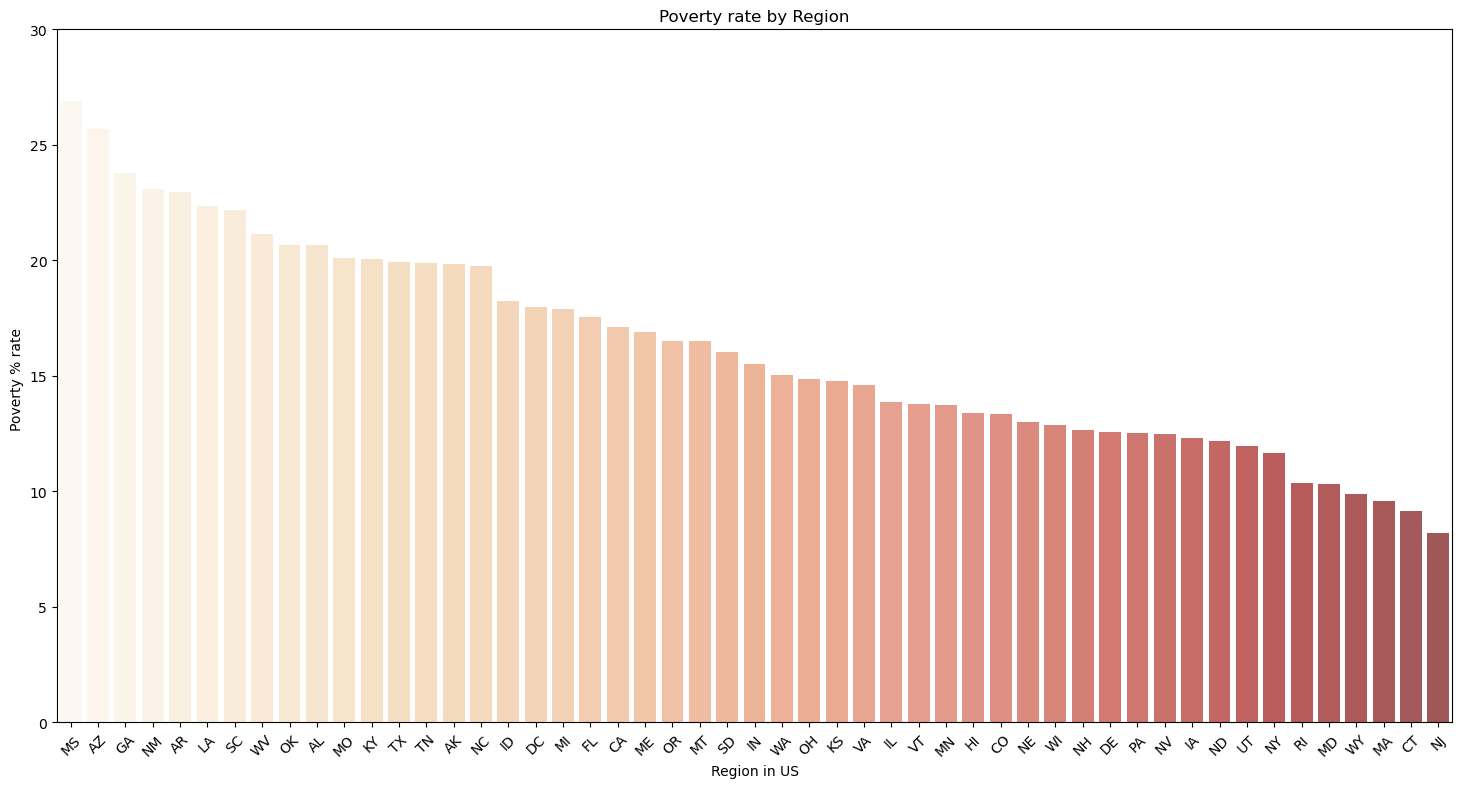

In [11]:
fig, ax = plt.subplots(figsize=(18, 9))

sns.barplot(data=avg_poverty_rate_per_area, x="Geographic Area", y="poverty_rate", ax=ax, palette='OrRd', alpha=0.7).set_ylim(ymin=0, ymax=30)
plt.xticks(rotation=45)
ax.set_title('Poverty rate by Region')
plt.xlabel('Region in US')
plt.ylabel('Poverty % rate ')

plt.show()

# Chart the High School Graduation Rate by US State

Show the High School Graduation Rate in ascending order of US States. Which state has the lowest high school graduation rate? Which state has the highest?

In [12]:
df_pct_completed_hs['percent_completed_hs'] = pd.to_numeric(df_pct_completed_hs['percent_completed_hs'], errors='coerce')
avg_completed_hs_per_area = df_pct_completed_hs.groupby('Geographic Area')['percent_completed_hs'].mean().reset_index()
avg_completed_hs_per_area = avg_completed_hs_per_area.sort_values(by='percent_completed_hs', ascending=False)

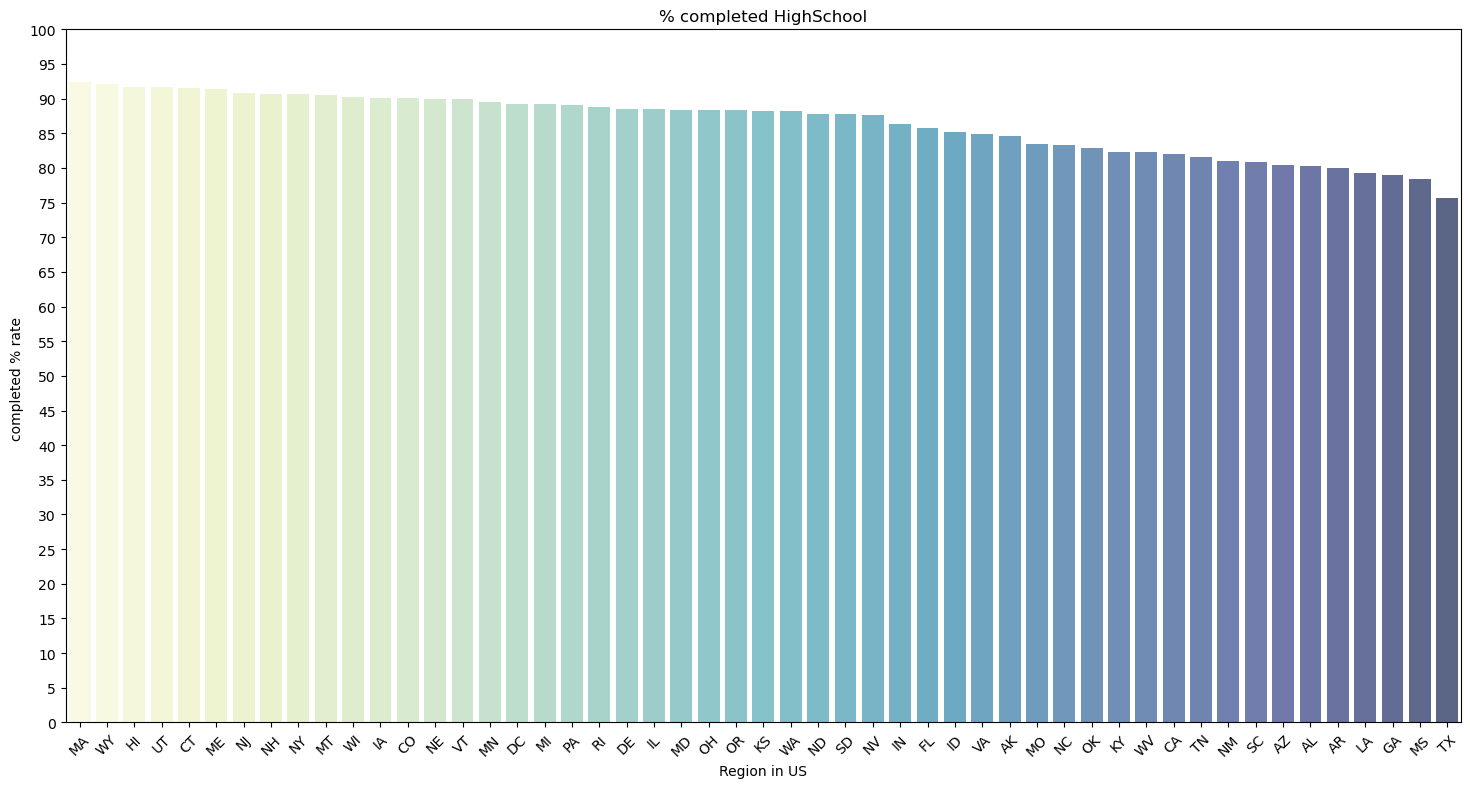

In [13]:
fig, ax = plt.subplots(figsize=(18, 9))

sns.barplot(data=avg_completed_hs_per_area, x="Geographic Area", y='percent_completed_hs', ax=ax, palette='YlGnBu', alpha=0.7).set_ylim(ymin=0, ymax=100)
ax.set_title('% completed HighSchool')
ax.yaxis.set_major_locator(MultipleLocator(5))
plt.xticks(rotation=45)
plt.xlabel('Region in US')
plt.ylabel('completed % rate ')

plt.show()

# Visualise the Relationship between Poverty Rates and High School Graduation Rates

#### Create a line chart with two y-axes to show if the rations of poverty and high school graduation move together.  

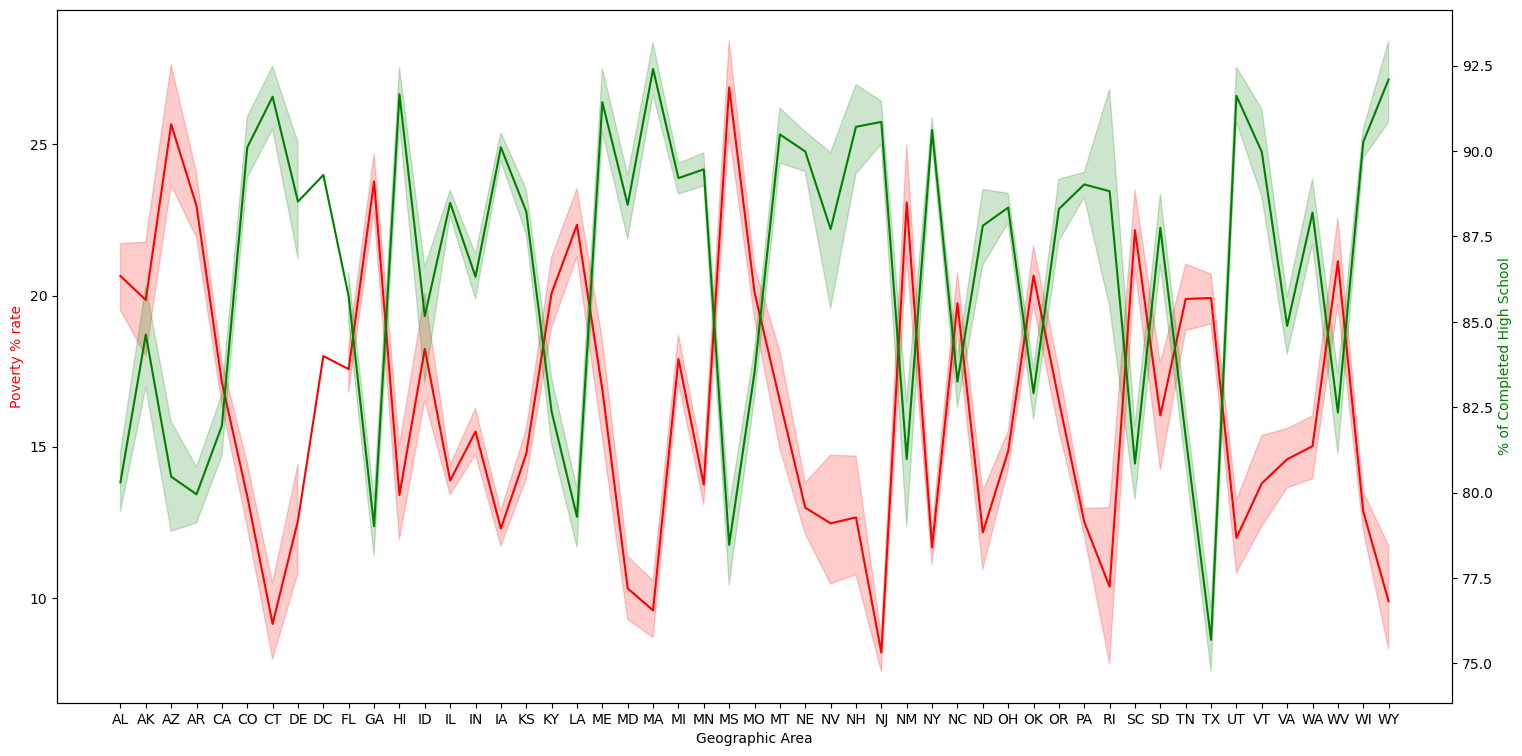

In [14]:
fig, ax = plt.subplots(figsize=(18, 9))

sns.lineplot(data=df_pct_poverty,y='poverty_rate',x='Geographic Area', color="r",ax=ax)
ax2 = ax.twinx()
sns.lineplot(data=df_pct_completed_hs,y='percent_completed_hs',x="Geographic Area", color="g", ax=ax2)

plt.xticks(rotation=45)
ax.set_ylabel('Poverty % rate', color='r')
ax2.set_ylabel('% of Completed High School', color='g')

plt.show()

#### Now use a Seaborn .jointplot() with a Kernel Density Estimate (KDE) and/or scatter plot to visualise the same relationship

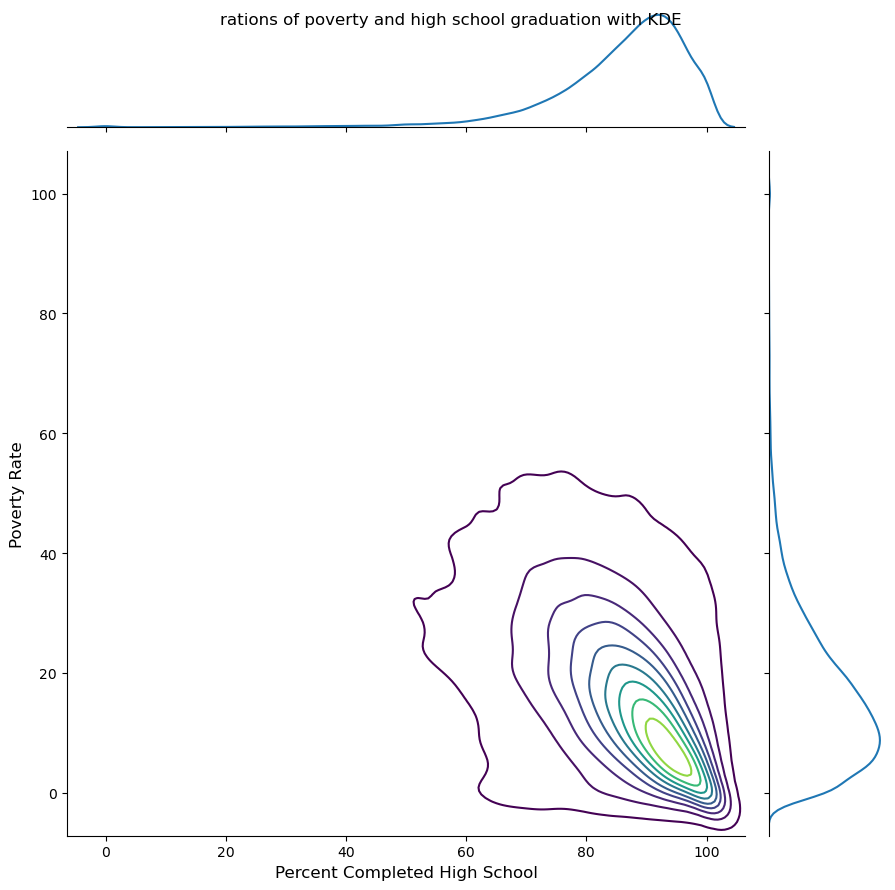

In [15]:
joint=sns.jointplot(y=df_pct_poverty['poverty_rate'],x=df_pct_completed_hs['percent_completed_hs'],kind='kde',cmap='viridis',height=9)
joint.fig.suptitle("rations of poverty and high school graduation with KDE")
joint.set_axis_labels('Percent Completed High School', 'Poverty Rate', fontsize=12)

plt.show()

#### Seaborn's `.lmplot()` or `.regplot()` to show a linear regression between the poverty ratio and the high school graduation ratio. 

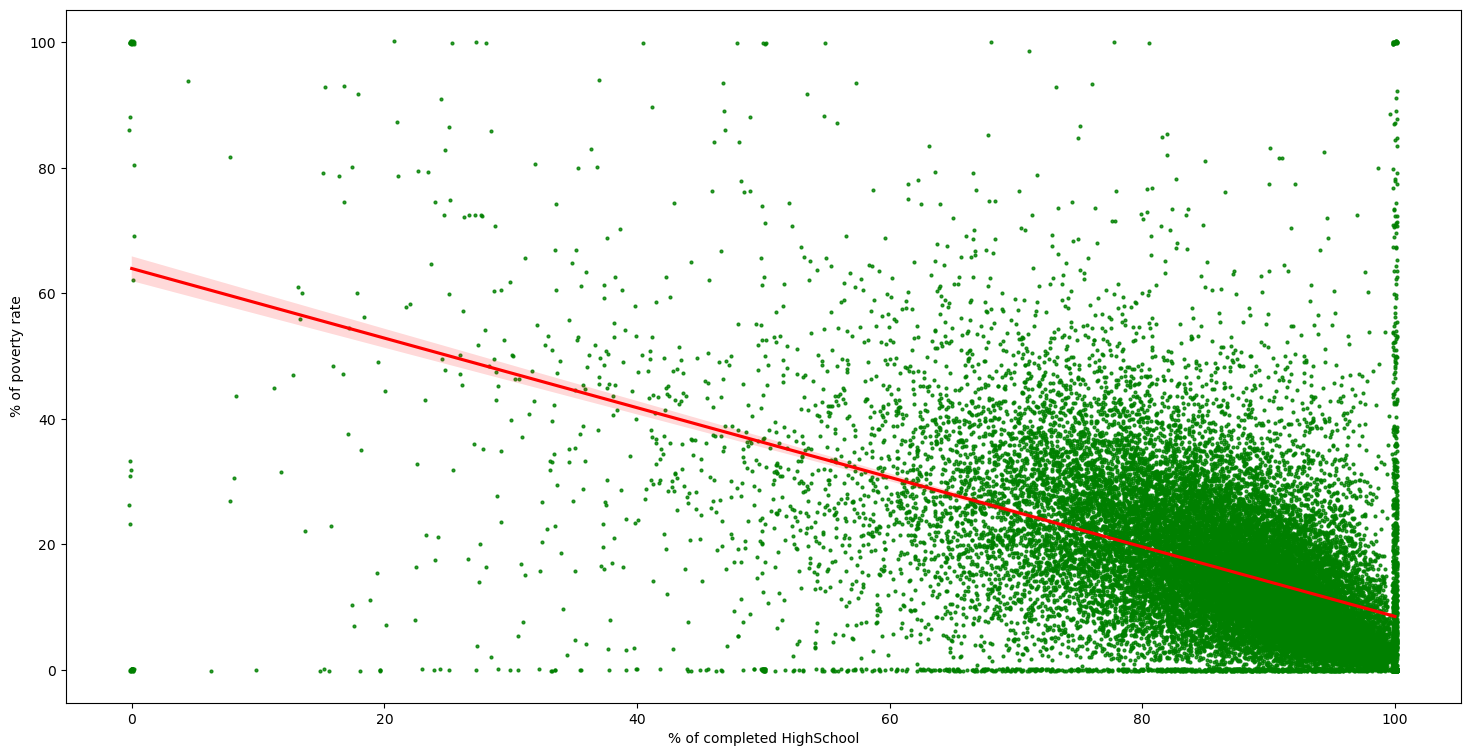

In [16]:
fig, ax = plt.subplots(figsize=(18, 9))
regplot=sns.regplot(y=df_pct_poverty['poverty_rate'],x=df_pct_completed_hs['percent_completed_hs'], x_jitter=0.2, y_jitter=0.2, scatter_kws={'s':4,'color':'green'}, line_kws={'color':'red'})
regplot.set_xlabel('% of completed HighSchool')
regplot.set_ylabel('% of poverty rate')

plt.show()

# Create a Bar Chart with Subsections Showing the Racial Makeup of Each US State

Visualise the share of the white, black, hispanic, asian and native american population in each US State using a bar chart with sub sections. 

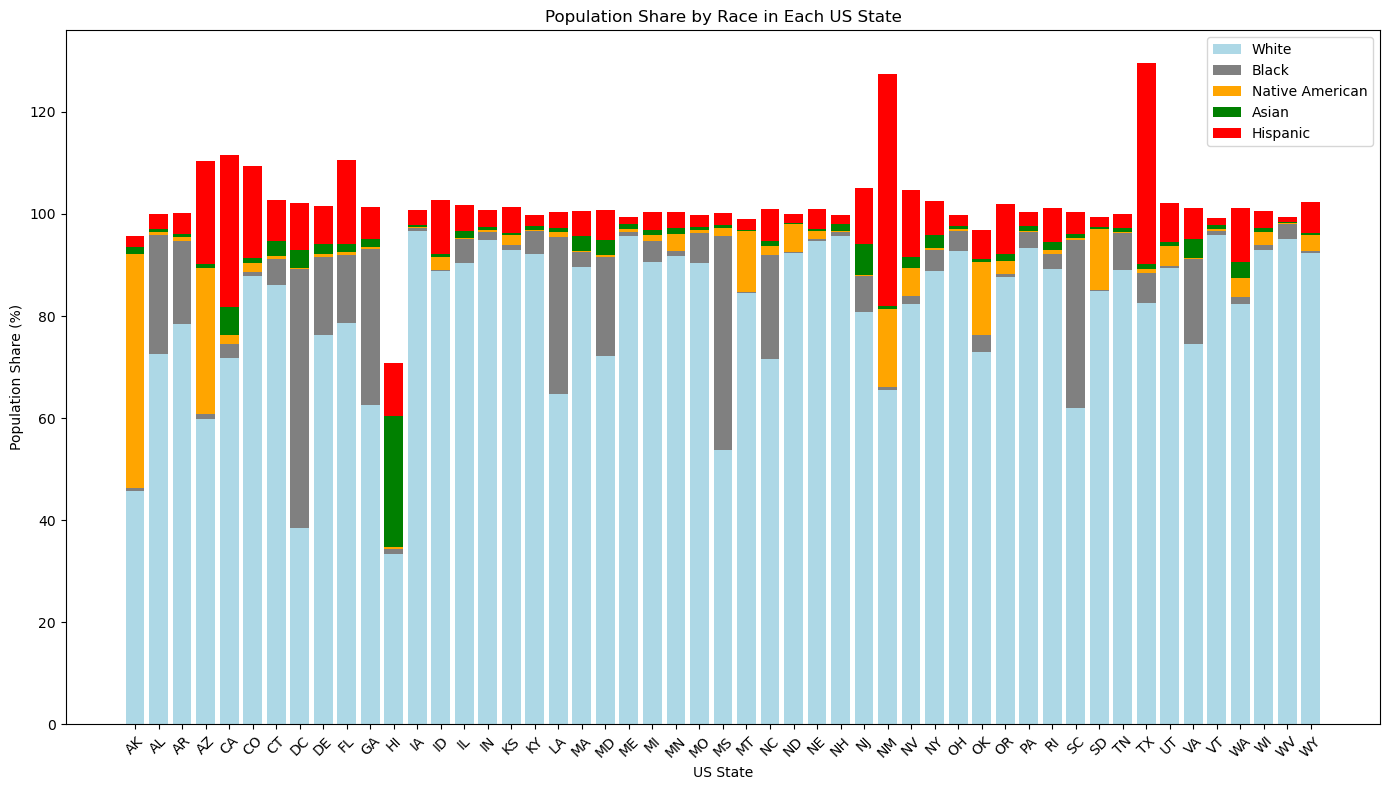

In [17]:
l=['share_white', 'share_black', 'share_native_american', 'share_asian', 'share_hispanic']
df_share_race_city['share_white'] = pd.to_numeric(df_share_race_city['share_white'], errors='coerce')
df_share_race_city['share_black'] = pd.to_numeric(df_share_race_city['share_black'], errors='coerce')
df_share_race_city['share_native_american'] = pd.to_numeric(df_share_race_city['share_native_american'], errors='coerce')
df_share_race_city['share_asian'] = pd.to_numeric(df_share_race_city['share_asian'], errors='coerce')
df_share_race_city['share_hispanic'] = pd.to_numeric(df_share_race_city['share_hispanic'], errors='coerce')

df_share_race_city['total'] = df_share_race_city[['share_white', 'share_black', 'share_native_american', 'share_asian', 'share_hispanic']].sum(axis=1)
df_normalized = df_share_race_city.copy()
df_normalized[['share_white', 'share_black', 'share_native_american', 'share_asian', 'share_hispanic']] = (
    df_share_race_city[['share_white', 'share_black', 'share_native_american', 'share_asian', 'share_hispanic']].div(df_share_race_city['total'], axis=0) * 100
)

df_normalized = df_normalized.drop(columns=['total'])

df_grouped = df_share_race_city.groupby('Geographic area')[l].mean().reset_index()

fig, ax = plt.subplots(figsize=(14, 8))

ax.bar(df_grouped['Geographic area'], df_grouped['share_white'], label='White', color='lightblue')
ax.bar(df_grouped['Geographic area'], df_grouped['share_black'], bottom=df_grouped['share_white'], label='Black', color='grey')
ax.bar(df_grouped['Geographic area'], df_grouped['share_native_american'], bottom=df_grouped['share_white'] + df_grouped['share_black'], label='Native American', color='orange')
ax.bar(df_grouped['Geographic area'], df_grouped['share_asian'], bottom=df_grouped['share_white'] + df_grouped['share_black'] + df_grouped['share_native_american'], label='Asian', color='green')
ax.bar(df_grouped['Geographic area'], df_grouped['share_hispanic'], bottom=df_grouped['share_white'] + df_grouped['share_black'] + df_grouped['share_native_american'] + df_grouped['share_asian'], 
       label='Hispanic', color='red')

ax.set_xlabel('US State')
ax.set_ylabel('Population Share (%)')
ax.set_title('Population Share by Race in Each US State')
ax.legend()

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [18]:
df_share_race_city.head(3)

,Geographic area,City,share_white,share_black,share_native_american,share_asian,share_hispanic,total
0,AL,Abanda CDP,67.20,30.20,0.00,0.00,1.60,99.00
1,AL,Abbeville city,54.40,41.40,0.10,1.00,3.10,100.00
2,AL,Adamsville city,52.30,44.90,0.50,0.30,2.30,100.30


# Create Donut Chart by of People Killed by Race

Hint: Use `.value_counts()`

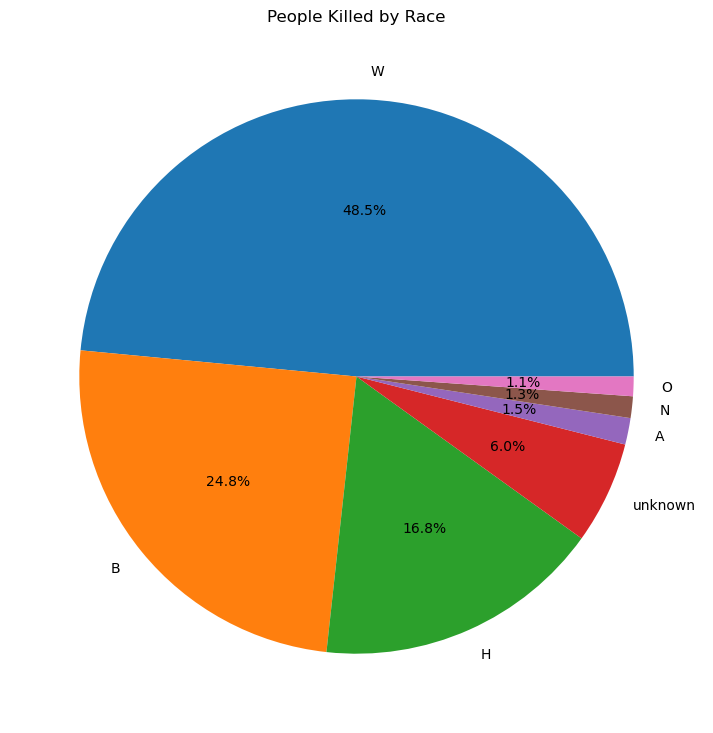

In [19]:
race_counts = df_fatalities['race'].value_counts()

fig, ax = plt.subplots(figsize=(18, 9))
ax.pie(race_counts, labels=race_counts.index, autopct='%1.1f%%')
ax.set_title('People Killed by Race')

plt.show()

# Create a Chart Comparing the Total Number of Deaths of Men and Women

Use `df_fatalities` to illustrate how many more men are killed compared to women. 

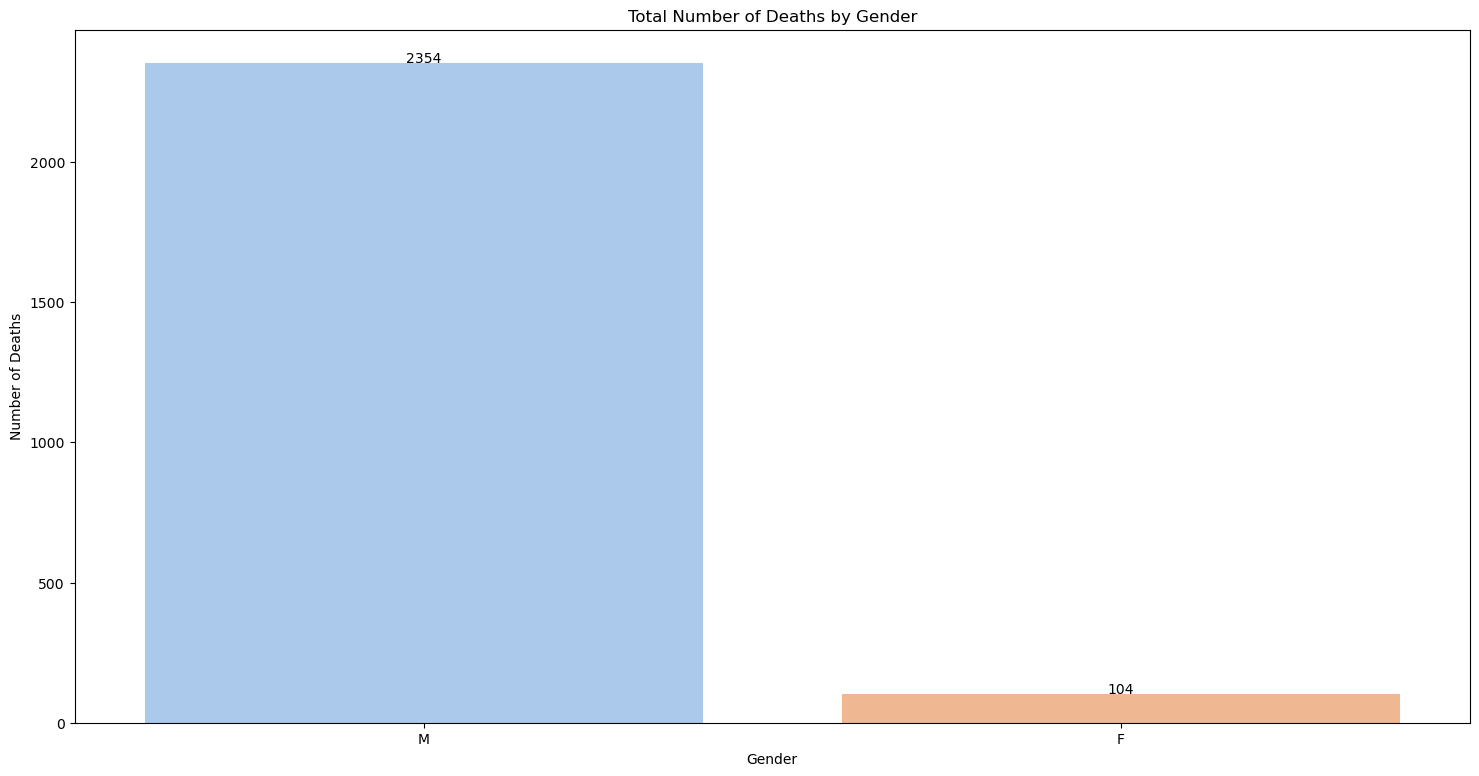

In [56]:
gender_counts = df_fatalities['gender'].value_counts().reset_index()
gender_counts.columns = ['gender', 'count']

plt.figure(figsize=(18, 9))
ax = sns.barplot(x='gender', y='count', data=gender_counts, palette='pastel')

plt.title('Total Number of Deaths by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Deaths')

for i, v in enumerate(gender_counts['count']):
    ax.text(i, v + 0.1, str(v), color='black', ha='center')

plt.show()


# Create a Box Plot Showing the Age and Manner of Death

Break out the data by gender using `df_fatalities`. Is there a difference between men and women in the manner of death? 

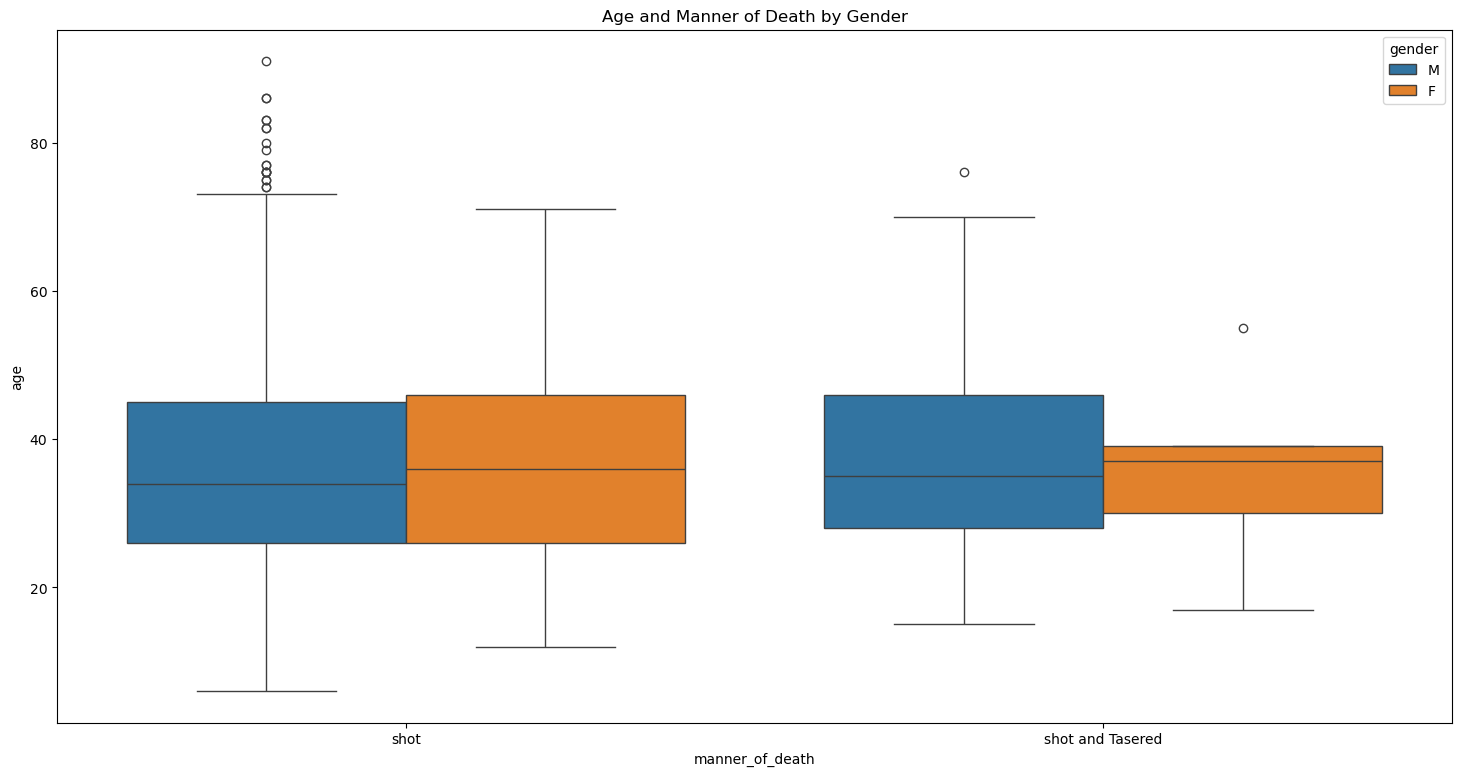

In [61]:
plt.figure(figsize=(18, 9))

ax = sns.boxplot(df_fatalities,y='age',x='manner_of_death', hue='gender')
plt.title('Age and Manner of Death by Gender')

plt.show()


# Were People Armed? 

In what percentage of police killings were people armed? Create chart that show what kind of weapon (if any) the deceased was carrying. How many of the people killed by police were armed with guns versus unarmed? 

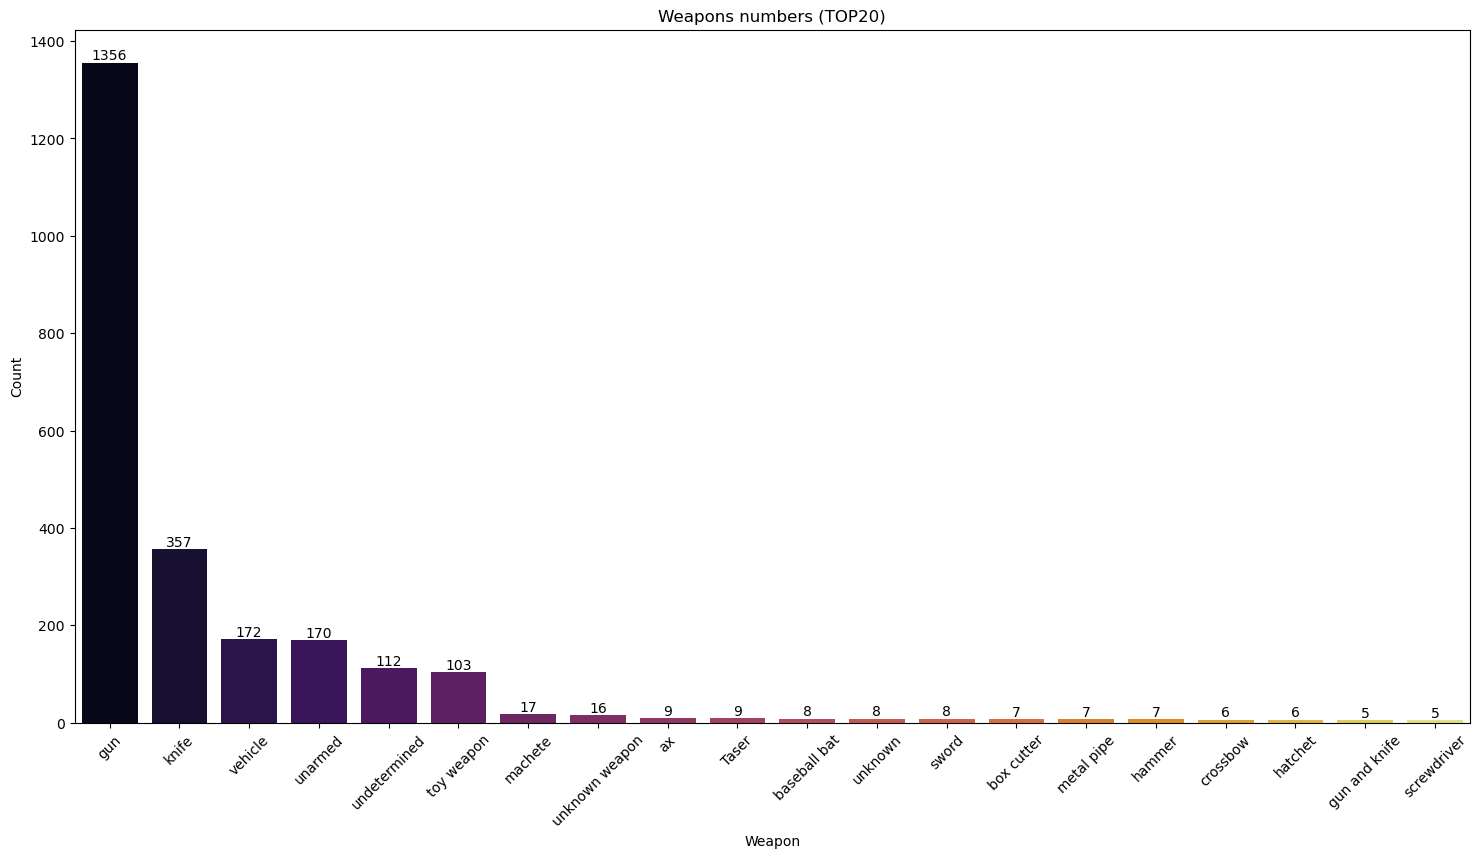

In [74]:
weapon_counts = df_fatalities['armed'].value_counts().reset_index()
weapon_counts.columns = ['weapon', 'count']
weapon_counts=weapon_counts.head(20)
plt.figure(figsize=(18, 9))
ax = sns.barplot(x='weapon', y='count', data=weapon_counts, palette='inferno')

plt.title('Weapons numbers (TOP20)')
plt.xlabel('Weapon')
plt.ylabel('Count')
plt.xticks(rotation=45)

for i in ax.containers:
    ax.bar_label(i,)

plt.show()

# How Old Were the People Killed?

Work out what percentage of people killed were under 25 years old.  

In [87]:
print(f"% of people killed were under 25 years old is: {round(df_fatalities[df_fatalities['age']<=25].shape[0]*100/df_fatalities.shape[0],2)}")

% of people killed were under 25 years old is: 22.5


Create a histogram and KDE plot that shows the distribution of ages of the people killed by police. 

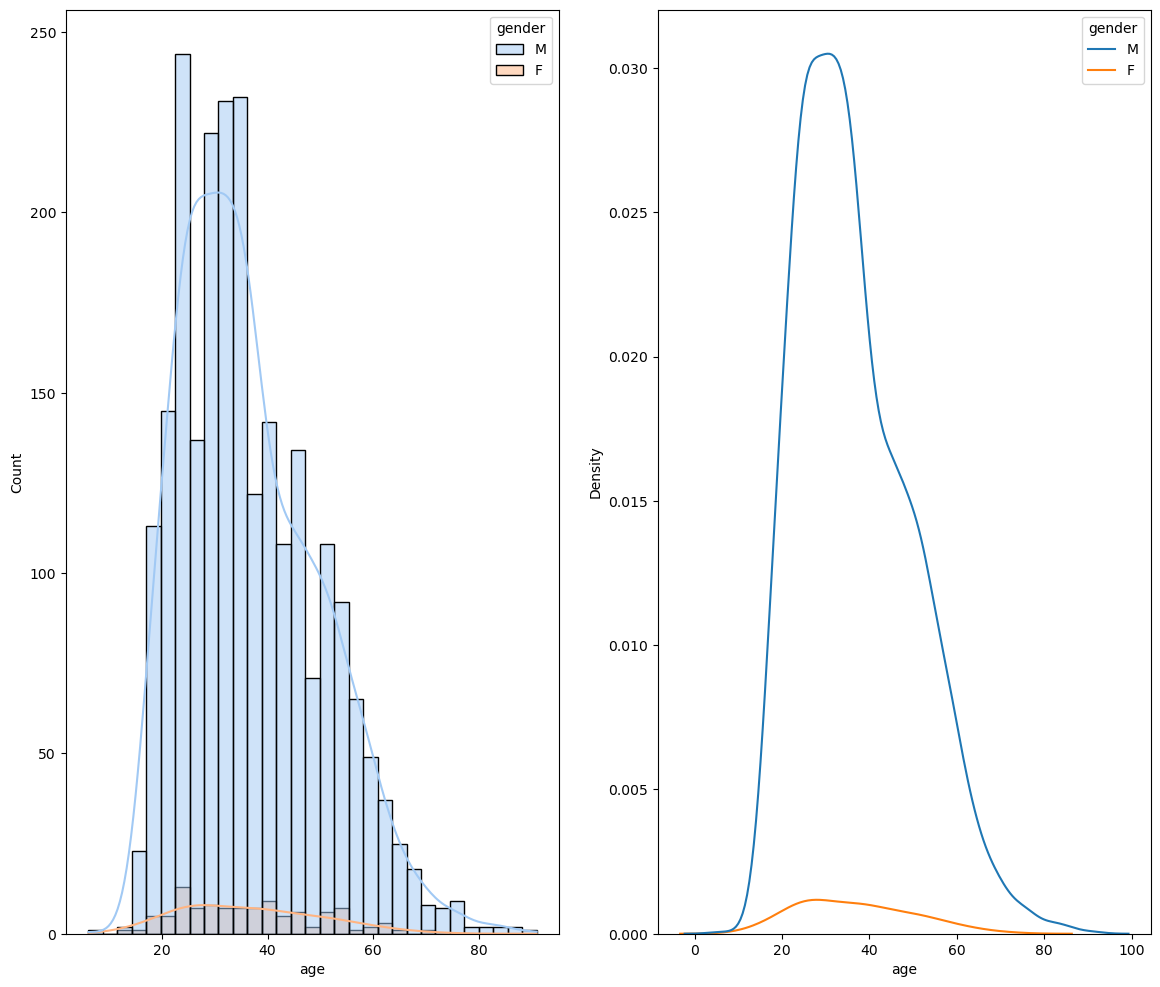

In [101]:
fig,axes=plt.subplots(1, 2, figsize=(14, 12))
sns.histplot(df_fatalities, x='age', kde=True,hue='gender', palette='pastel',ax=axes[0])
sns.kdeplot(df_fatalities,x='age',hue='gender',ax=axes[1])

plt.show()

Create a seperate KDE plot for each race. Is there a difference between the distributions? 

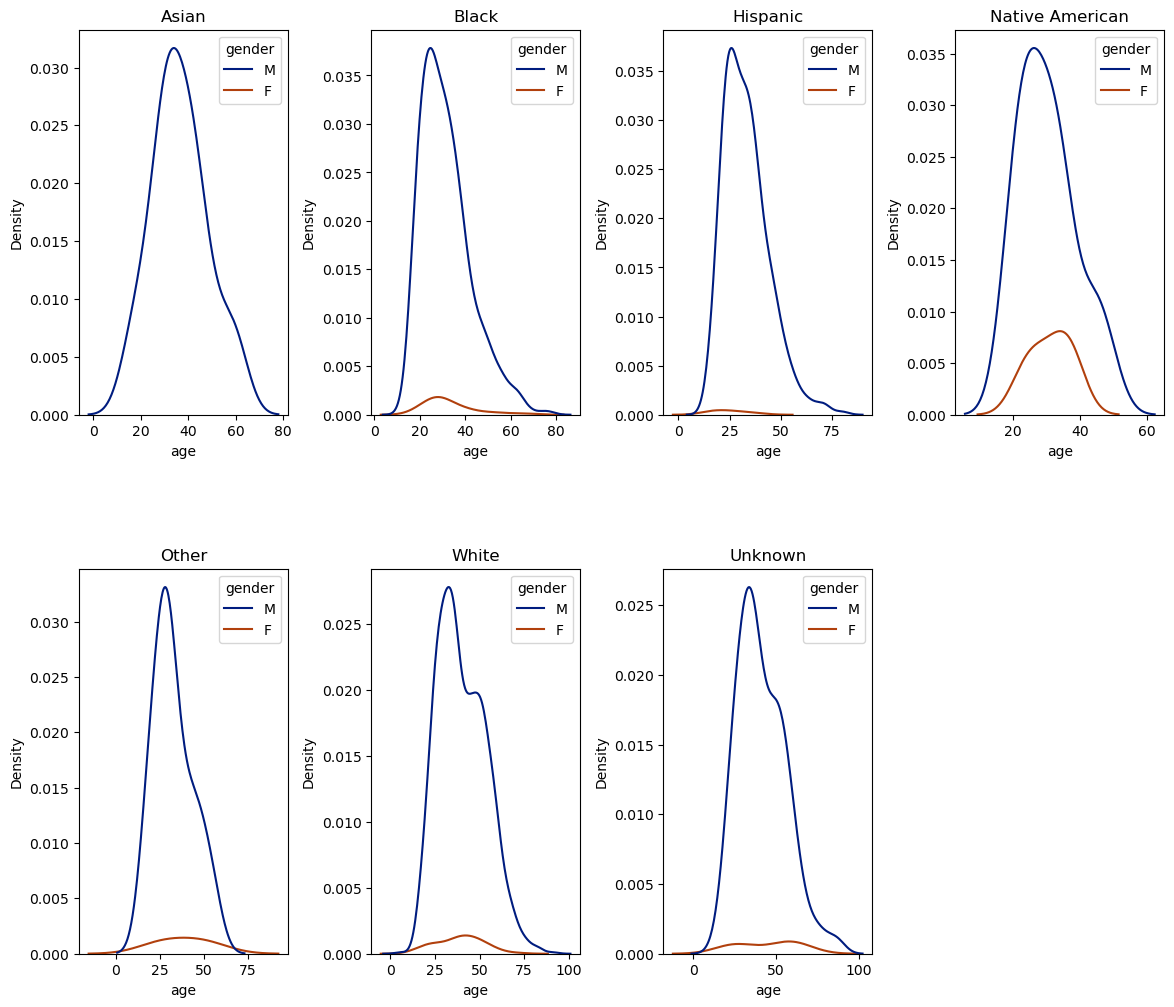

In [124]:
fig,axes=plt.subplots(2, 4, figsize=(14, 12))

sns.set_palette('dark')
sns.kdeplot(df_fatalities[df_fatalities['race']=='A'],x='age',hue='gender',ax=axes[0,0]).set_title('Asian')
sns.kdeplot(df_fatalities[df_fatalities['race']=='B'],x='age',hue='gender',ax=axes[0,1]).set_title('Black')
sns.kdeplot(df_fatalities[df_fatalities['race']=='H'],x='age',hue='gender',ax=axes[0,2]).set_title('Hispanic')
sns.kdeplot(df_fatalities[df_fatalities['race']=='N'],x='age',hue='gender',ax=axes[0,3]).set_title('Native American')
sns.kdeplot(df_fatalities[df_fatalities['race']=='O'],x='age',hue='gender',ax=axes[1,0]).set_title('Other')
sns.kdeplot(df_fatalities[df_fatalities['race']=='W'],x='age',hue='gender',ax=axes[1,1]).set_title('White')
sns.kdeplot(df_fatalities[df_fatalities['race']=='unknown'],x='age',hue='gender',ax=axes[1,2]).set_title('Unknown')
axes[1, 3].axis('off')

plt.subplots_adjust(wspace=0.4, hspace=0.4)
plt.show()

# Mental Illness and Police Killings

What percentage of people killed by police have been diagnosed with a mental illness?

In [126]:
print(f"% of people killed by police have been diagnosed with a mental illness is: {round(df_fatalities[df_fatalities['signs_of_mental_illness']==True].shape[0]*100/df_fatalities.shape[0],2)}")

% of people killed by police have been diagnosed with a mental illness is: 25.18


# In Which Cities Do the Most Police Killings Take Place?

Create a chart ranking the top 10 cities with the most police killings. Which cities are the most dangerous?  

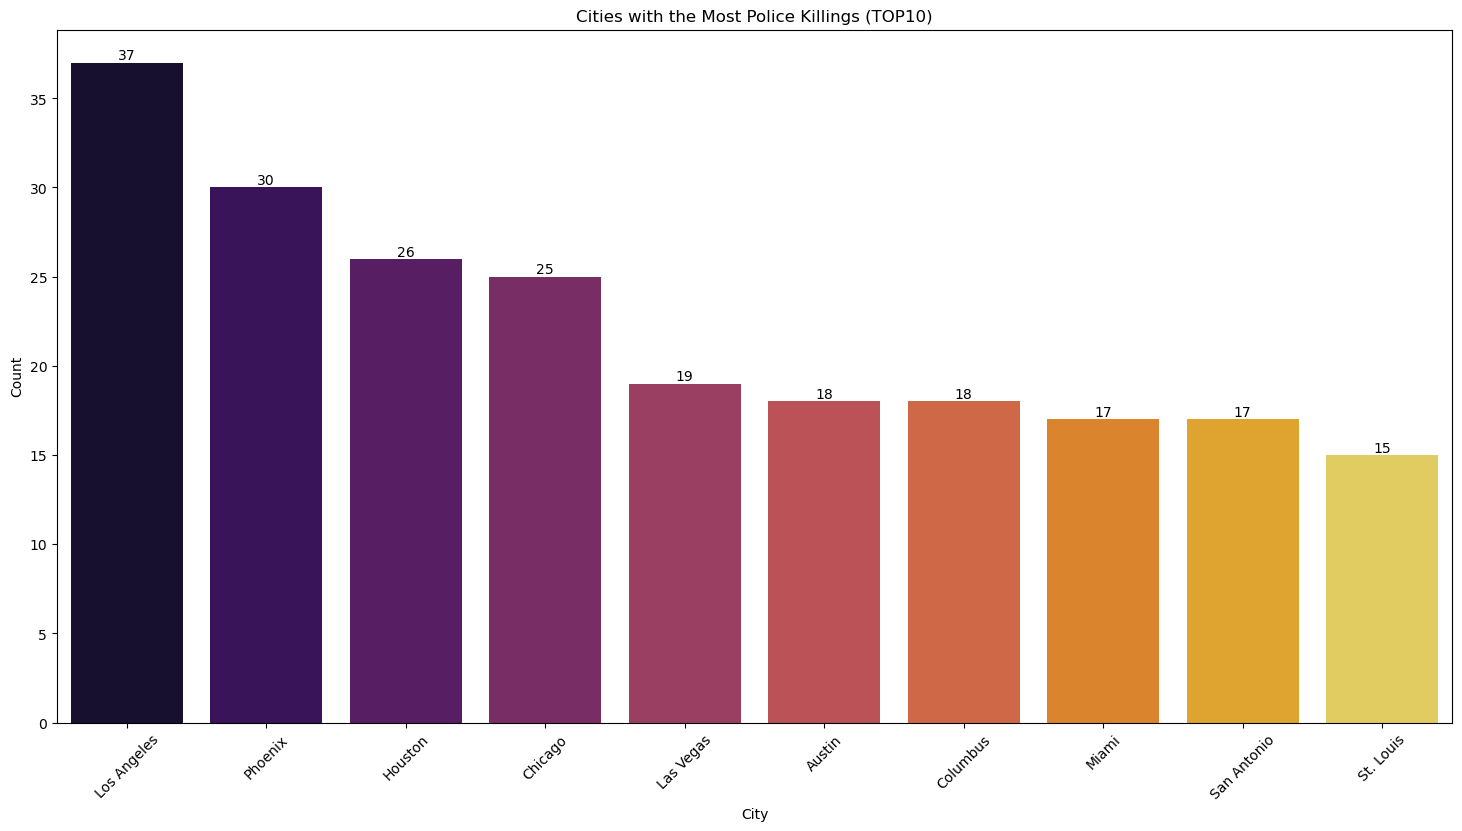

In [130]:
city_counts = df_fatalities['city'].value_counts().reset_index()
city_counts.columns = ['city', 'count']
city_counts=city_counts.head(10)
plt.figure(figsize=(18, 9))
ax = sns.barplot(x='city', y='count', data=city_counts, palette='inferno')

plt.title('Cities with the Most Police Killings (TOP10)')
plt.xlabel('City')
plt.ylabel('Count')
plt.xticks(rotation=45)

for i in ax.containers:
    ax.bar_label(i,)

plt.show()

# Rate of Death by Race

Find the share of each race in the top 10 cities. Contrast this with the top 10 cities of police killings to work out the rate at which people are killed by race for each city. 

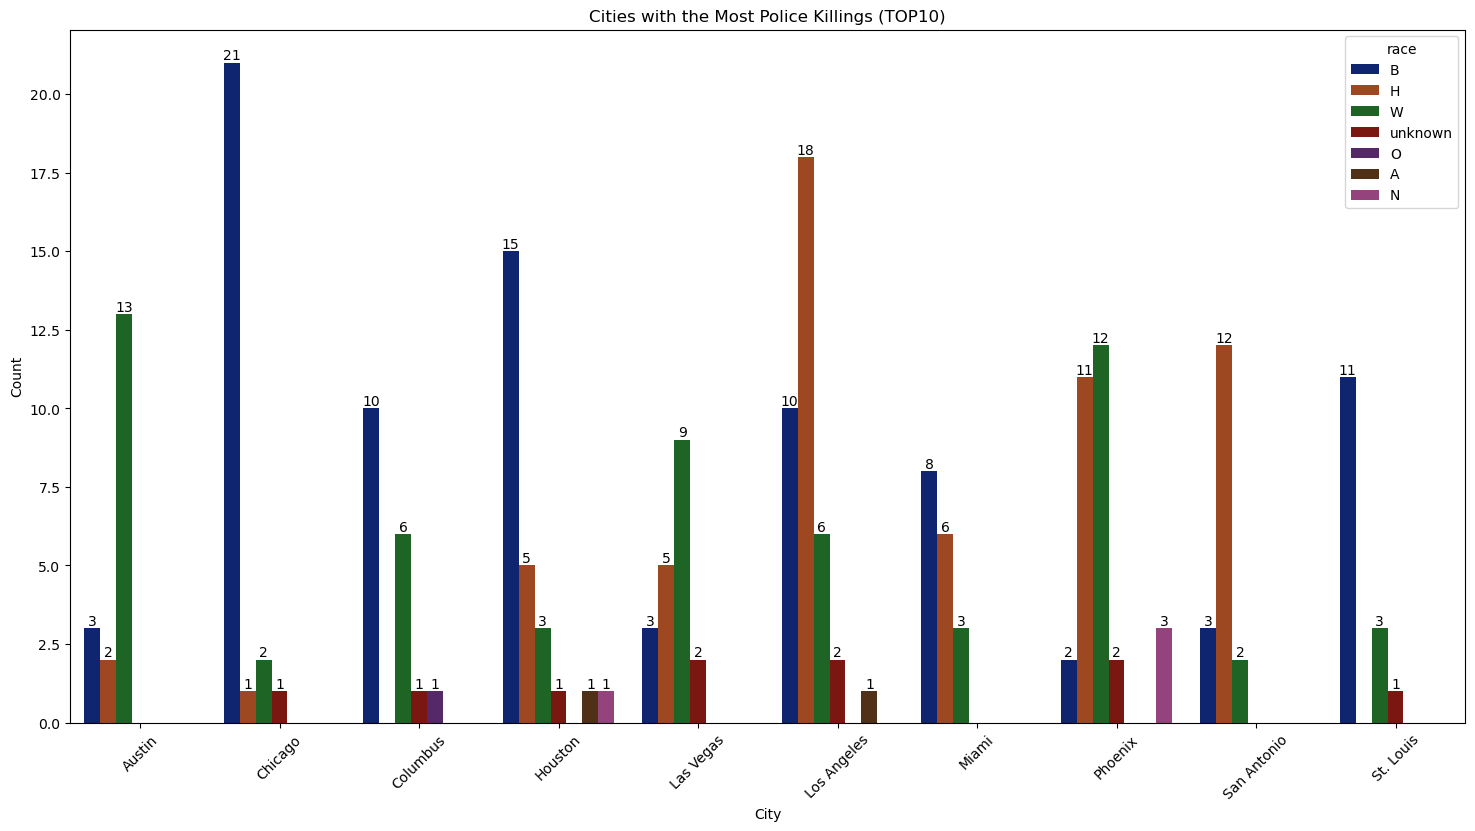

In [134]:
city_race_counts = df_fatalities.groupby(['city', 'race']).size().reset_index(name='count')
top_cities = city_race_counts.groupby('city')['count'].sum().nlargest(10).index
top_city_race_counts = city_race_counts[city_race_counts['city'].isin(top_cities)]

plt.figure(figsize=(18, 9))
ax = sns.barplot(x='city', y='count', data=top_city_race_counts, hue='race')

plt.title('Cities with the Most Police Killings (TOP10)')
plt.xlabel('City')
plt.ylabel('Count')
plt.xticks(rotation=45)

for container in ax.containers:
    ax.bar_label(container)

plt.show()

# Create a Choropleth Map of Police Killings by US State

Which states are the most dangerous? Compare your map with your previous chart. Are these the same states with high degrees of poverty? 

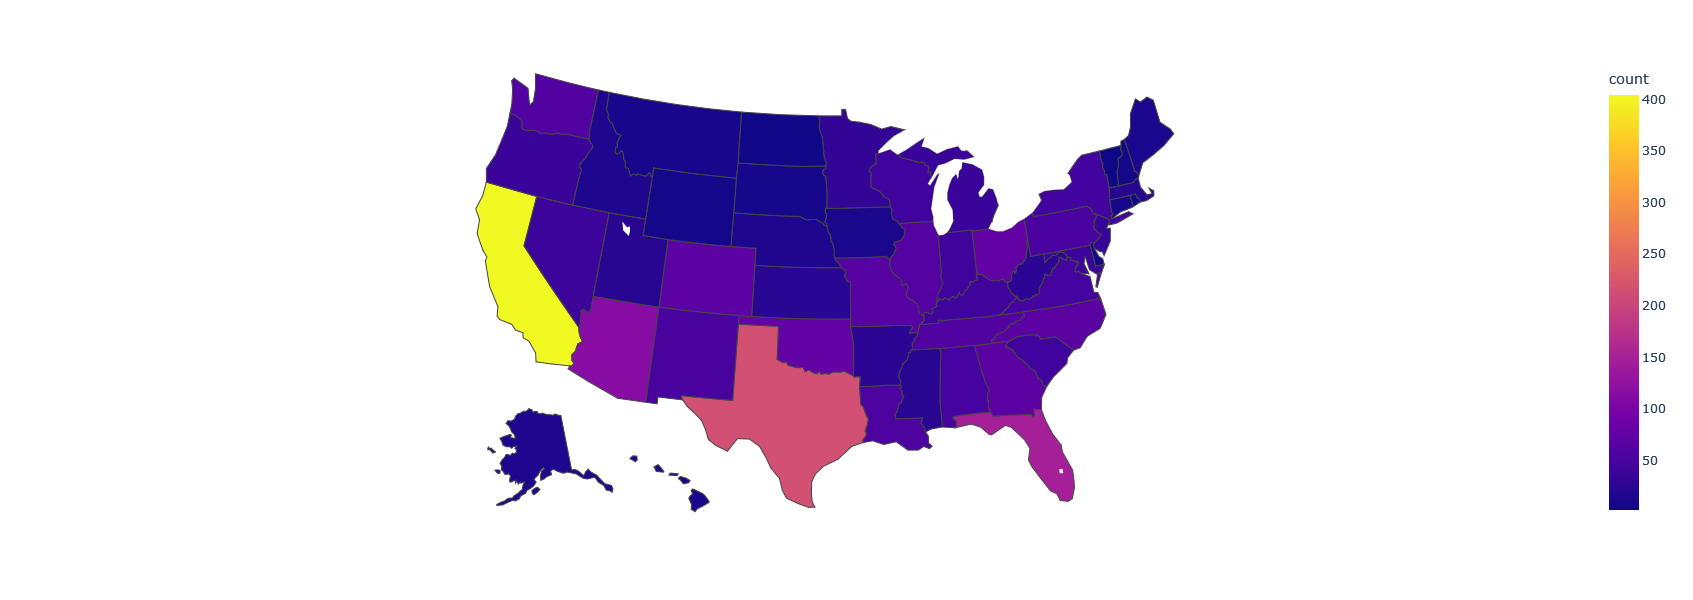

In [142]:
state_counts = df_fatalities['state'].value_counts().reset_index()
state_counts.columns = ['state', 'count']
fig=px.choropleth(state_counts,locationmode='USA-states',locations='state', scope='usa', color='count')
fig.update_layout(width=1000,height=600)
fig.show()

# Number of Police Killings Over Time

Analyse the Number of Police Killings over Time. Is there a trend in the data? 

In [159]:
df_fatalities['date'] = pd.to_datetime(df_fatalities['date'])
df_fatalities['year_month'] = df_fatalities['date'].dt.to_period('M')

monthly_counts = df_fatalities['year_month'].value_counts().reset_index()
monthly_counts.columns = ['year_month', 'count']
monthly_counts = monthly_counts.sort_values(by='year_month')
monthly_counts['year_month'] = monthly_counts['year_month'].astype(str)
monthly_counts['year_month'] = pd.to_datetime(monthly_counts['year_month'], format='%Y-%m')

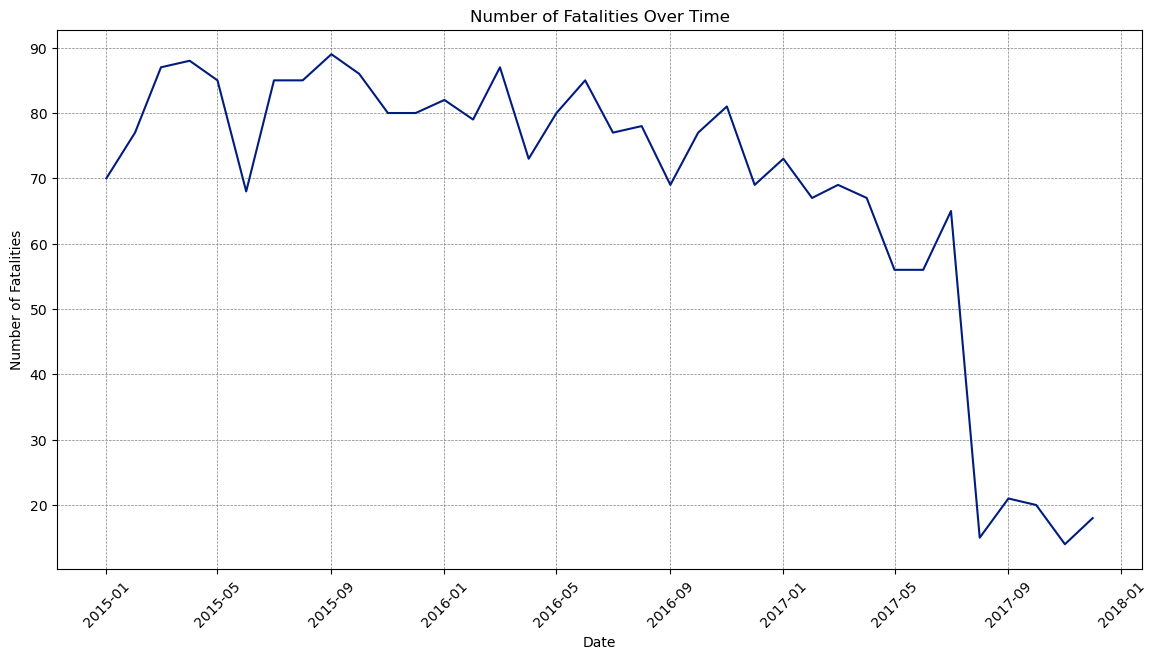

In [167]:
plt.figure(figsize=(14, 7))
ax=sns.lineplot(data=monthly_counts,x='year_month', y='count', markers=True, dashes=False)
plt.title('Number of Fatalities Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Fatalities')
plt.xticks(rotation=45)

ax.grid(True, which='both', linestyle='--', linewidth=0.5, color='gray')
plt.show()